In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import classification_report
from warnings import simplefilter
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn
# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image
simplefilter(action='ignore',category=FutureWarning)

Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
X=[]
Z=[]
IMG_SIZE=80
DAISY_DIR='/content/drive/My Drive/flowerslab/daisy'
SUNFLOWER_DIR='/content/drive/My Drive/flowerslab/sunflower'
ROSE_DIR='/content/drive/My Drive/flowerslab/rose'
DANDELION_DIR='/content/drive/My Drive/flowerslab/dandelion'
TULIP_DIR='/content/drive/My Drive/flowerslab/tulip'

In [ ]:
def assign_label(img,flower_type):
    return flower_type
    

In [ ]:
def train_data(flower_type,DIR):
    for im in tqdm(os.listdir(DIR)):
        label=assign_label(im,flower_type)
    for i in os.scandir(DIR):
        if i.is_file():
            filename=(i.path)
            im=cv2.imread(filename,1)
            im=cv2.resize(im,(80,80))
            im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        X.append(np.array(im))
        Z.append(str(label))

In [ ]:
train_data('Daisy',DAISY_DIR)
print(len(X))
train_data('Dandelion',DANDELION_DIR)
print(len(X))
train_data('Rose',ROSE_DIR)
print(len(X))
train_data('Sunflower',SUNFLOWER_DIR)
print(len(X))
train_data('Tulip',TULIP_DIR)
print(len(X))

100%|██████████| 769/769 [00:00<00:00, 1395077.76it/s]


769


100%|██████████| 1052/1052 [00:00<00:00, 647455.29it/s]


1821


100%|██████████| 784/784 [00:00<00:00, 598968.00it/s]


2605


100%|██████████| 734/734 [00:00<00:00, 1144042.79it/s]


3339


100%|██████████| 984/984 [00:00<00:00, 272206.51it/s]


4323


In [ ]:
#Label Encoding
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
#X=X/255
print(X.shape)
X=X[:,:,:,np.newaxis]

(4323, 80, 80)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.10,random_state=10)
print(x_train.shape)
np.random.seed(10)
rn.seed(10)
tf.set_random_seed(10)

(3890, 80, 80, 1)


In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (80,80,1)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [ ]:
#data augmentation to prevent overfitting
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [ ]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 80, 80, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 40, 40, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 40, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 96)        55392     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 96)     

In [ ]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=60),
                              epochs = 50, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] / 60)
model.save('Shadakaloful(1).h5')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/50





65/64 [==============================] - 58s 887ms/step - loss: 1.5832 - acc: 0.2700 - val_loss: 1.4914 - val_acc: 0.3395
Epoch 2/50
65/64 [==============================] - 56s 857ms/step - loss: 1.4903 - acc: 0.3545 - val_loss: 1.4229 - val_acc: 0.3857
Epoch 3/50
65/64 [==============================] - 56s 854ms/step - loss: 1.4410 - acc: 0.3879 - val_loss: 1.3607 - val_acc: 0.4111
Epoch 4/50
65/64 [==============================] - 55s 854ms/step - loss: 1.4042 - acc: 0.4095 - val_loss: 1.3399 - val_acc: 0.4388
Epoch 5/50
65/64 [==============================] - 56s 855ms/step - loss: 1.3732 - acc: 0.4267 - val_loss: 1.2869 - val_acc: 0.4758
Epoch 6/50
65/64 [==============================] - 56s 860ms/step - loss: 1.3356 - acc: 0.4515 - val_loss: 1.3328 - val_acc: 0.4388
Epoch 7/50
65/64 [==============================] - 55s 852ms/step - loss: 1.2909 - acc: 0.4719 - va

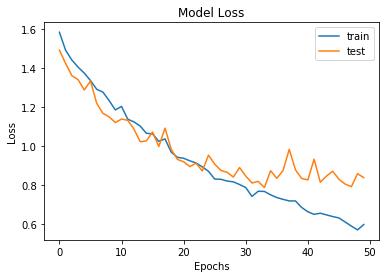

In [ ]:
#Plotting Loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

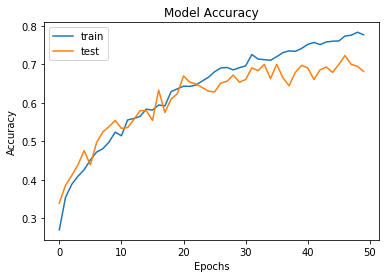

In [ ]:
#plotting accuracy
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (4,4),padding = 'Same',activation ='relu', input_shape = (80,80,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters =64, kernel_size = (4,4),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [ ]:
#data augmentation to prevent overfitting
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [ ]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 80, 80, 16)        272       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 40, 40, 16)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 40, 40, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 40, 40, 32)        12832     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 20, 20, 32)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 20, 20, 32)        128       
_________________________________________________________________
dropout_8 (Dropout)          (None, 20, 20, 32)       

In [ ]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=128),
                              epochs = 50, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] / 128)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
31/30 [==============================] - 47s 2s/step - loss: 2.0176 - acc: 0.2980 - val_loss: 1.8223 - val_acc: 0.3233
Epoch 2/50
31/30 [==============================] - 45s 1s/step - loss: 1.5777 - acc: 0.3530 - val_loss: 1.7347 - val_acc: 0.2887
Epoch 3/50
31/30 [==============================] - 44s 1s/step - loss: 1.4323 - acc: 0.3975 - val_loss: 1.6095 - val_acc: 0.3995
Epoch 4/50
31/30 [==============================] - 44s 1s/step - loss: 1.3928 - acc: 0.4178 - val_loss: 1.8268 - val_acc: 0.3095
Epoch 5/50
31/30 [==============================] - 45s 1s/step - loss: 1.3289 - acc: 0.4597 - val_loss: 1.8572 - val_acc: 0.3048
Epoch 6/50
31/30 [==============================] - 45s 1s/step - loss: 1.2815 - acc: 0.4825 - val_loss: 1.5178 - val_acc: 0.4226
Epoch 7/50
31/30 [==============================] - 45s 1s/step - loss: 1.2530 - acc: 0.5024 - val_loss: 1.5749 - val_acc: 0

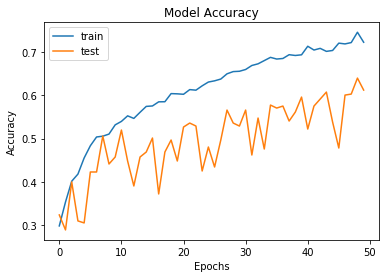

In [ ]:
#plotting accuracy
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()